In [11]:
import os
from angstrom import Trajectory
import numpy as np
from thermof.read import read_log, read_thermo

In [14]:
maindir = 'data/rigid-spring-test'
simlist = [os.path.join(maindir, i) for i in os.listdir(maindir)]

thermo_headers = 'Step Temp Press TotEng E_pair E_mol Fmax Fnorm c_C1[1] c_C1[2] c_C1[3]'
thermo_keys = ['step', 'temp', 'press', 'etotal', 'epair', 'emol', 'fmax', 'fnorm', 'x', 'y', 'z']

In [18]:
data = {'dx': [], 'dy': [], 'k': [], 'xstd': [], 'ystd': []}
thermodata = []
for sim in simlist:
    traj = Trajectory(read=os.path.join(sim, 'traj.xyz'))
    com = traj.get_center()
    data['dx'].append(max(com[:, 0]) - min(com[:, 0]))
    data['dy'].append(max(com[:, 1]) - min(com[:, 1]))
    data['xstd'].append(np.std(com[:, 0]))
    data['ystd'].append(np.std(com[:, 1]))
    data['k'].append(float(os.path.basename(sim)))
    
    logfile = os.path.join(sim, 'log.HtBDC_Cu110')
    thermo_data = read_log(logfile, headers=thermo_headers)
    thermo = read_thermo(thermo_data, headers=thermo_keys)[0]
    thermodata.append(thermo)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

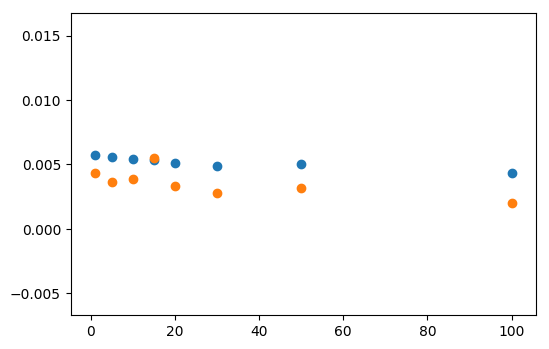

In [7]:
plt.scatter(data['k'], data['dx'])
plt.scatter(data['k'], data['dy'])

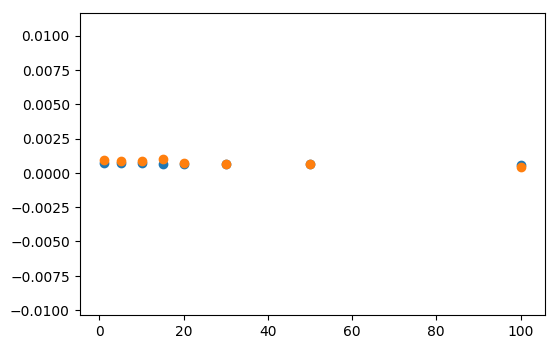

In [8]:
plt.scatter(data['k'], data['xstd'])
plt.scatter(data['k'], data['ystd'])

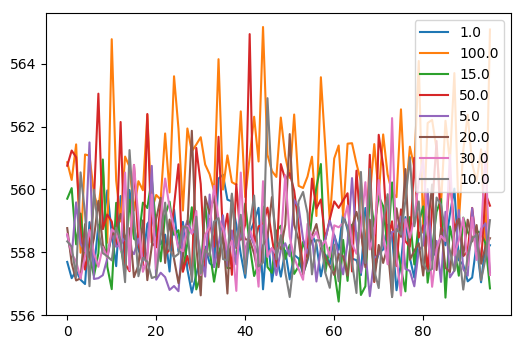

In [27]:
for d in thermodata:
    plt.plot(d['etotal'][5:])
plt.legend(data['k'])

In [24]:
thermo.keys()

dict_keys(['temp', 'y', 'epair', 'fmax', 'emol', 'z', 'x', 'press', 'fnorm', 'etotal', 'step'])